---
# pRF ses-4

This notebook aims to unravel the frequency domain of our pRF-design, on which we can then base our filtering operations

In [14]:
from linescanning import utils
from pRFline import fitting
import numpy as np
import warnings
import nibabel as nb
import matplotlib.pyplot as plt
from scipy import signal
import os
opj = os.path.join

warnings.simplefilter('ignore')
project_dir = os.environ.get("DIR_PROJECTS")
base_dir = os.path.join(project_dir, 'hemifield')
deriv_dir = opj(base_dir, 'derivatives')

plot_vox = 359
plot_xkcd = False
np.set_printoptions(precision=3)


In [15]:
# Load data
sub         = '003'
ses         = 4
task        = "task-pRF"
run         = [2,5]
func_dir    = opj(base_dir, f"sub-{sub}", f"ses-{ses}", "func")
anat_dir    = opj(base_dir, f"sub-{sub}", f"ses-{ses}", "anat")
prf_new     = opj(base_dir, 'derivatives', 'prf', f"sub-{sub}", f"ses-{ses}")
ribbon      = [357,364]

if not os.path.exists(prf_new):
    os.makedirs(prf_new, exist_ok=True)

Use `fitting.FitLines()`-class, which inherits from `linescanning.dataset.Dataset`, to read in the functional files, and average across runs and iterations

In [16]:
# func_files = utils.get_file_from_substring(["task-pRF", "bold.mat"], func_dir, exclude="run-2")
log_dir = "/data1/projects/MicroFunc/Jurjen/projects/hemifield/sourcedata/sub-003/ses-4/sub-003_ses-4_task-pRF_run-imgs"
# # log_dir = "/mnt/d/FSL/shared/spinoza/programs/project_repos/LineExps/lineprf/logs/sub-003_ses-4_task-pRF_run-imgs"

# line_fit = fitting.FitLines(func_files=func_files,
#                             TR=0.105,
#                             low_pass=True,
#                             high_pass=True,
#                             window_size=11,
#                             poly_order=3,
#                             log_dir=log_dir,
#                             stage='grid+iter',
#                             model='norm',
#                             baseline_duration=20,
#                             iter_duration=240,
#                             n_iterations=2,
#                             verbose=True,
#                             filter="lowpass",
#                             ribbon=[356,363],
#                             fmri_output="filt+psc",
#                             output_dir=prf_new)

# line_fit.fit()
# run-4
run4 = utils.get_file_from_substring([f"sub-{sub}", f"ses-{ses}", f"{task}", "run-4", "bold.mat"], func_dir)
run5 = utils.get_file_from_substring([f"sub-{sub}", f"ses-{ses}", f"{task}", "run-5", "bold.mat"], func_dir)
funcs = [run4, run5]
run45_psc = fitting.FitLines(func_files=funcs,
                            TR=0.105,
                            low_pass=True,
                            high_pass=True,
                            window_size=11,
                            poly_order=3,
                            log_dir=log_dir,
                            stage='grid+iter',
                            model='norm',
                            baseline_duration=20,
                            iter_duration=240,
                            n_iterations=2,
                            verbose=True,
                            ribbon=ribbon)

run45_psc.fit()


DATASET
Filter set to None, but low_pass+high_pass=True, setting filter to 'lowpass'

FUNCTIONAL
Preprocessing /mnt/export/data1/projects/MicroFunc/Jurjen/projects/hemifield/sub-003/ses-4/func/sub-003_ses-4_task-pRF_run-4_bold.mat
 Cutting 0 volumes from beginning
 DCT-high pass filter [removes low frequencies <0.01 Hz]
 Savitsky-Golay low pass filter [removes high frequences] (window = 11, order = 3)
 Data used for percent-change: 'lowpass'
Preprocessing /mnt/export/data1/projects/MicroFunc/Jurjen/projects/hemifield/sub-003/ses-4/func/sub-003_ses-4_task-pRF_run-5_bold.mat
 Cutting 0 volumes from beginning
 DCT-high pass filter [removes low frequencies <0.01 Hz]
 Savitsky-Golay low pass filter [removes high frequences] (window = 11, order = 3)
 Data used for percent-change: 'lowpass'

DATASET: created
Fetching dataframe from attribute 'df_func_psc'
Selecting GM-voxels: [357, 364]
Chunking/averaging iterations
 Baseline 	 = 190 vols (~19.95s) based on TR of 0.105s (20s was specified/req

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   16.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   24.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   28.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   28.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   28.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   28.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   28.4s finished


Norm gridfit completed at 2022/03/03 14:38:09. Mean rsq>0.1: 0.5242484041622707
Gridfit took 0:00:28.454169
Save grid-fit parameters in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_model-norm_stage-grid_desc-prf_params.npy
Starting norm iterfit at 2022/03/03 14:38:09
Norm iterfit completed at 2022/03/03 14:56:19. Mean rsq>0.1: 0.5365545966922699
Iterfit took 0:18:10.069581
Save iter-fit parameters in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_model-norm_stage-iter_desc-prf_params.npy
Save iter-fit predictions in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_model-norm_stage-iter_desc-predictions.npy


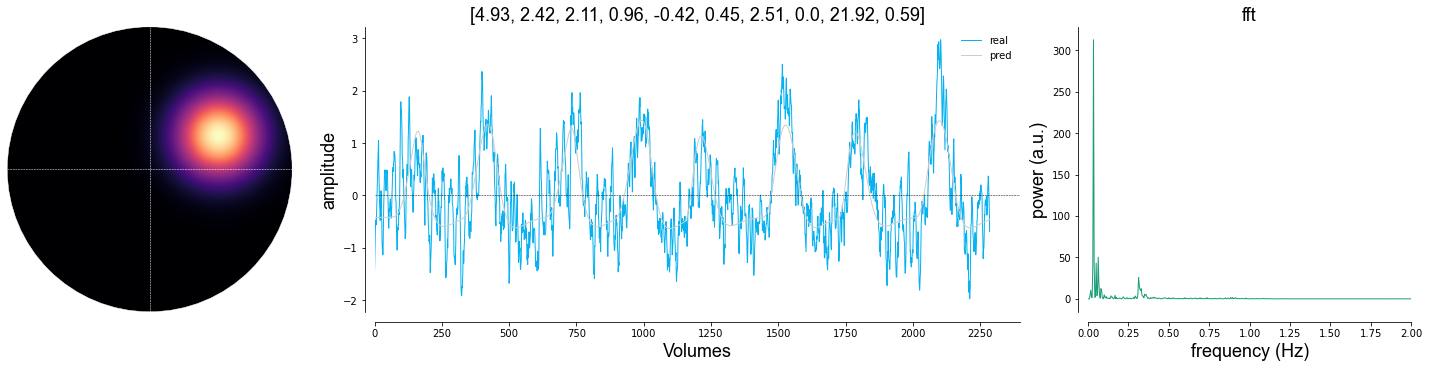

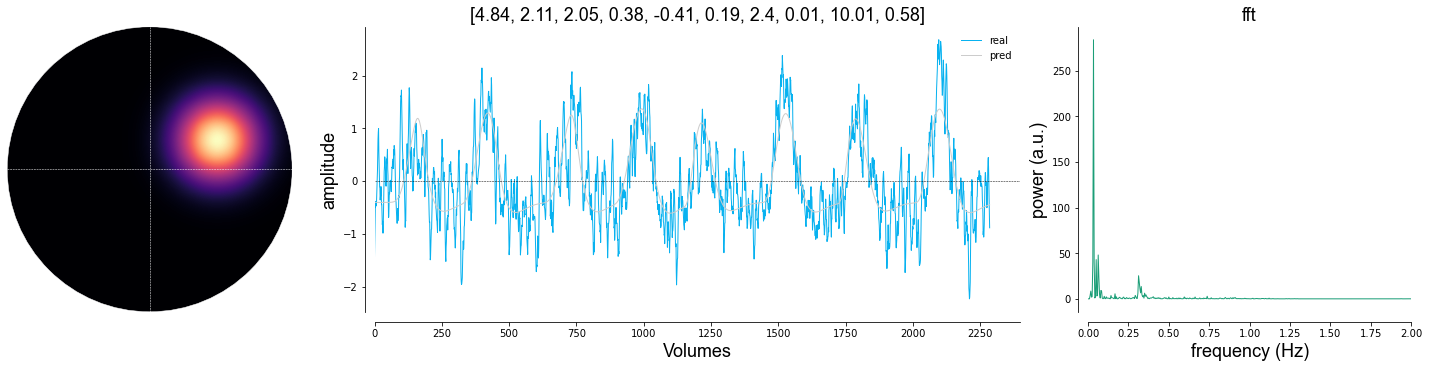

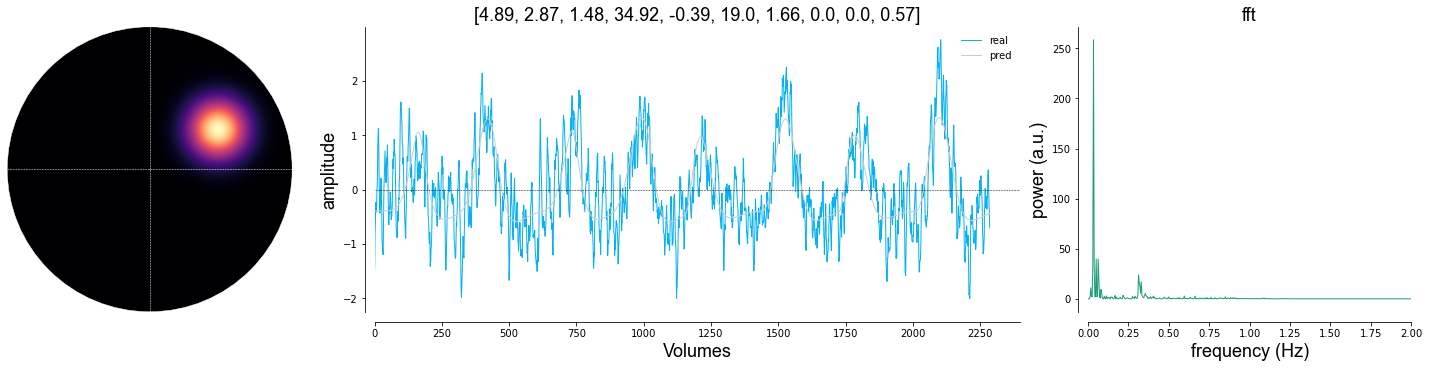

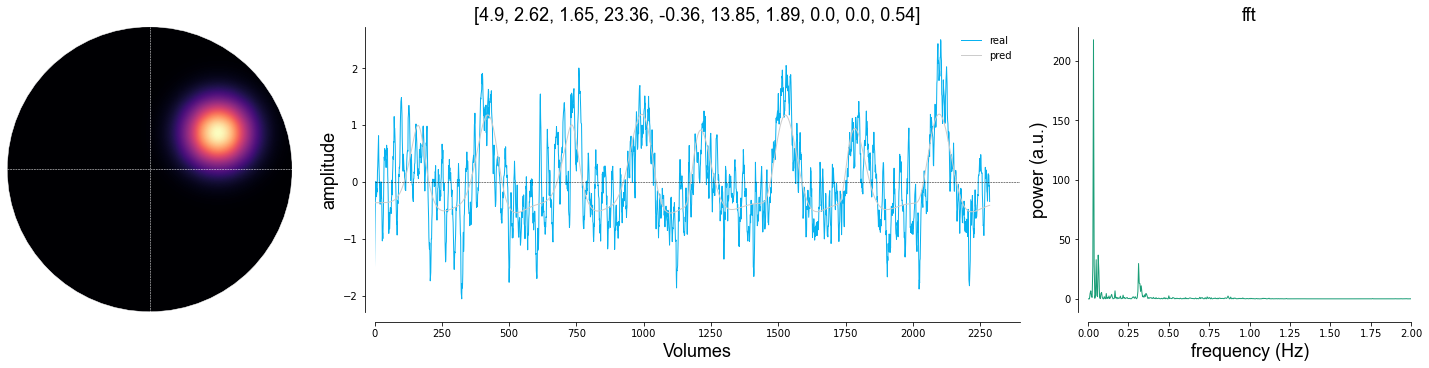

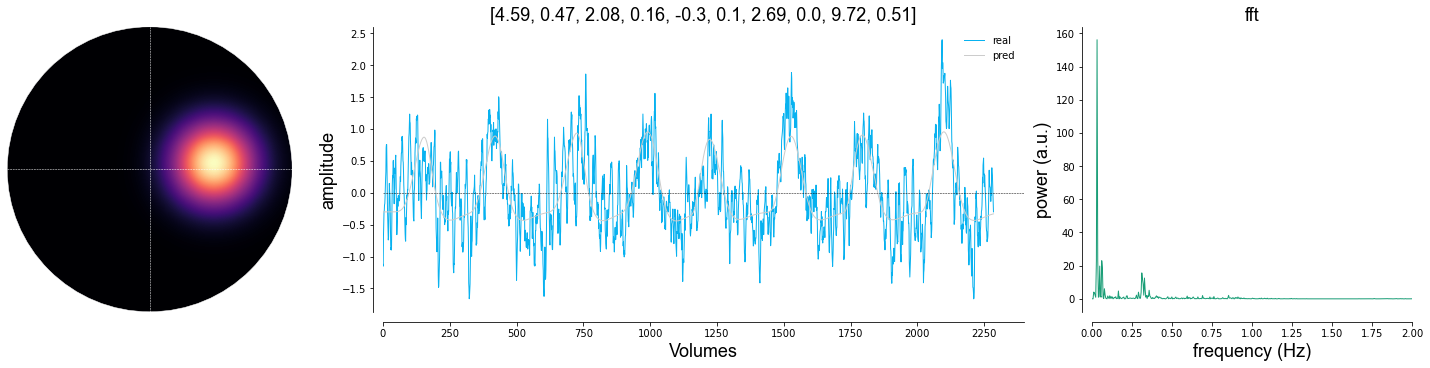

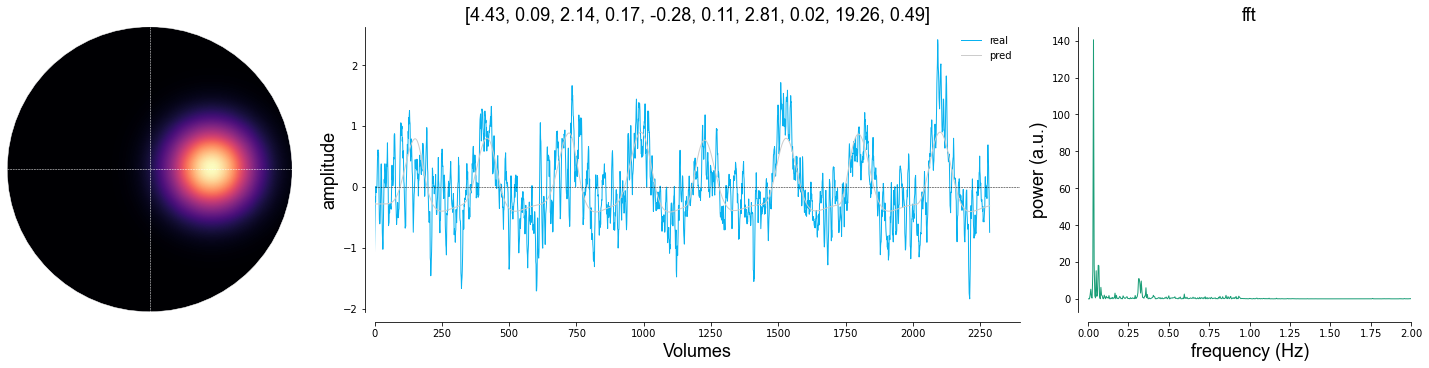

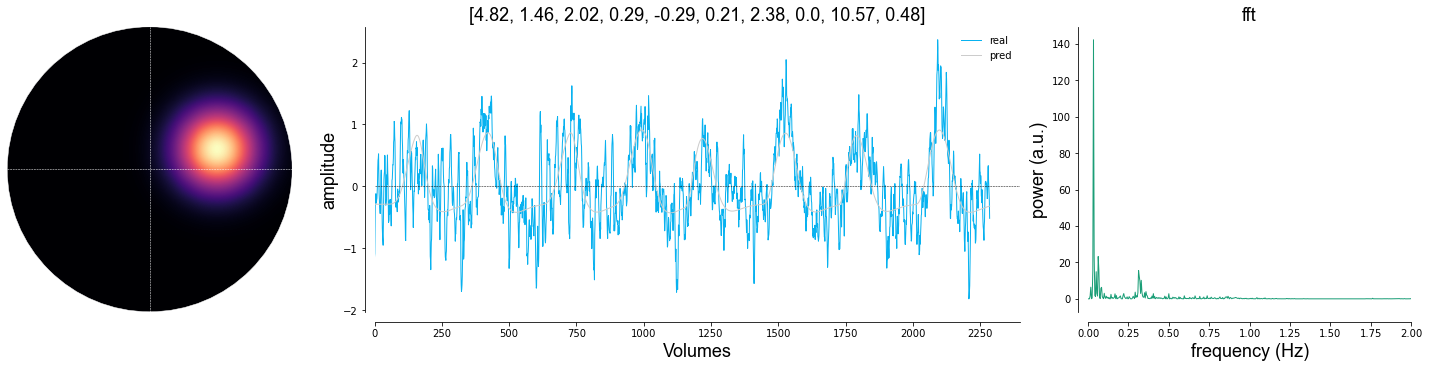

In [17]:
for vox_id in range(run45_psc.df_ribbon.shape[-1]):
    pars,_,_ = run45_psc.fitter.plot_vox(vox_nr=vox_id, model='norm', xkcd=False, title='pars', transpose=False, freq_spectrum=True, freq_type="fft")

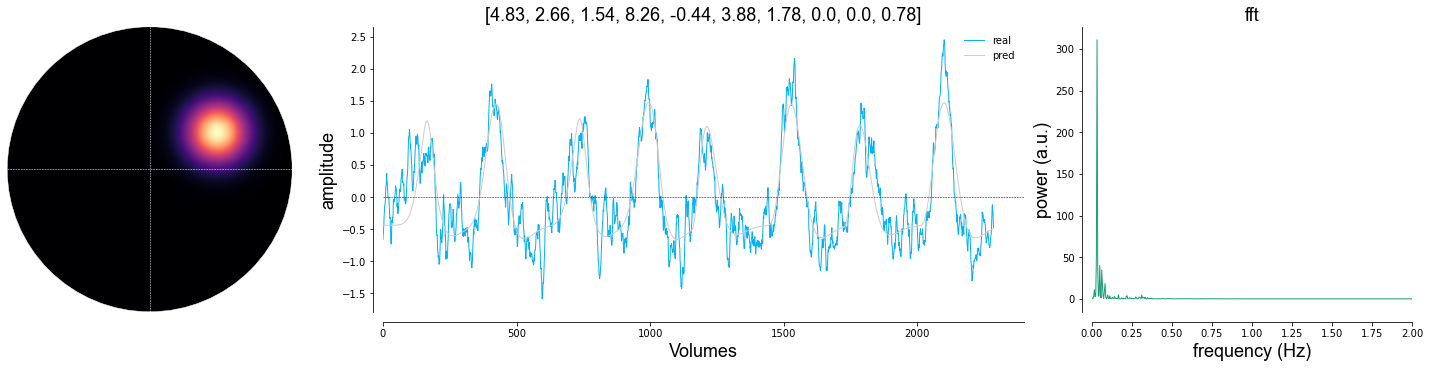

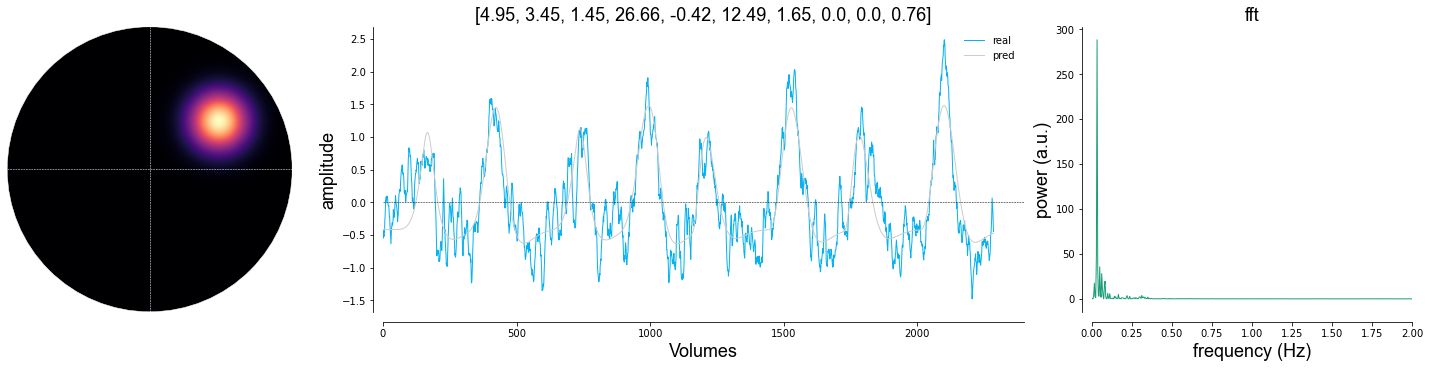

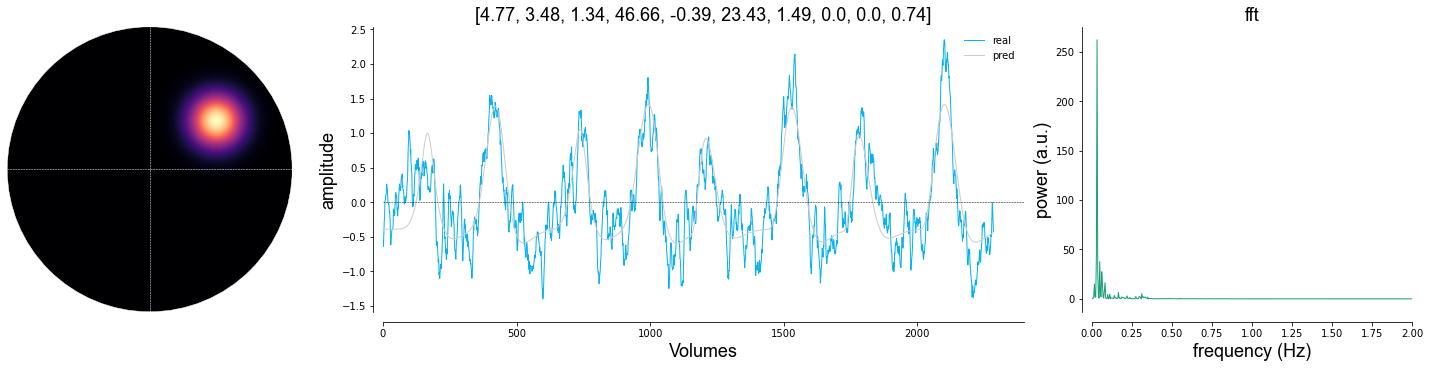

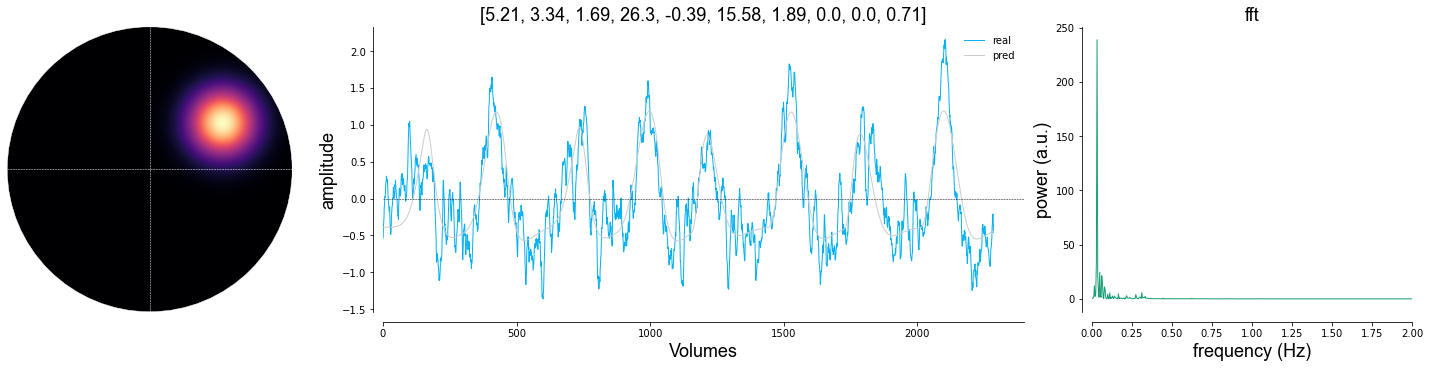

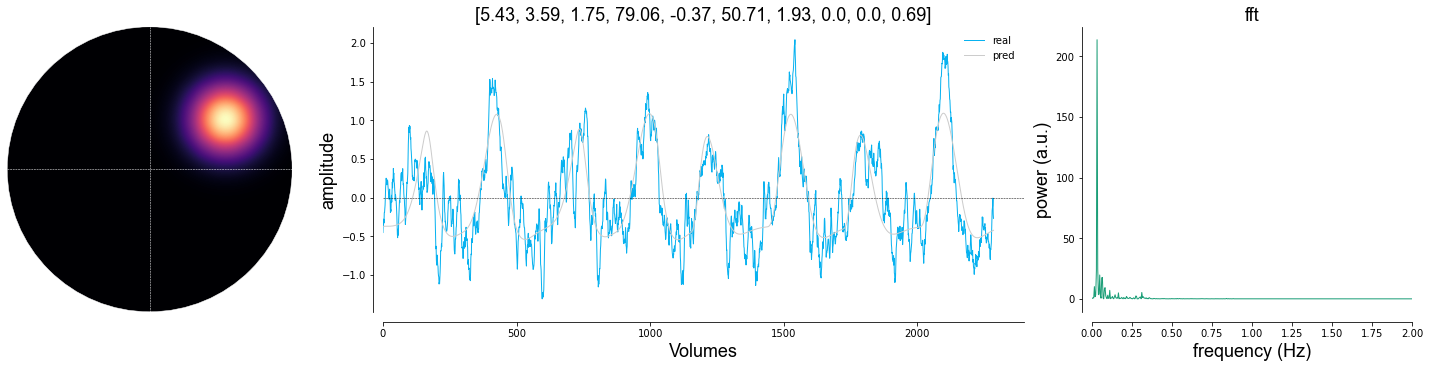

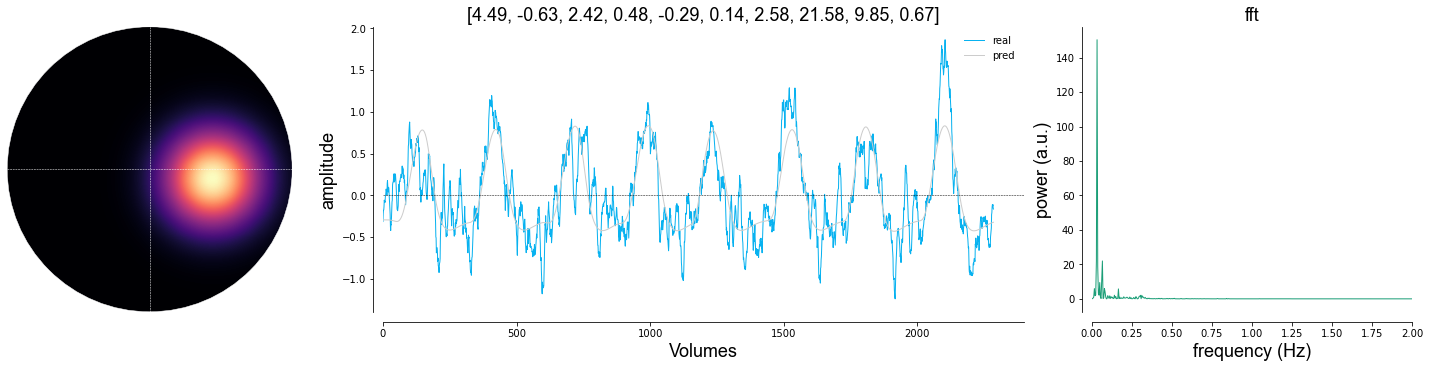

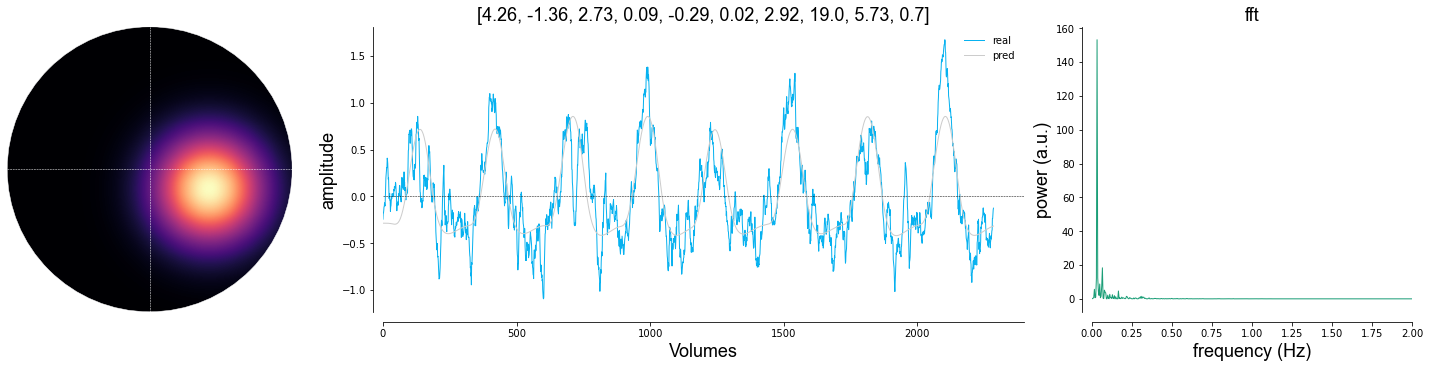

In [9]:
# for vox_id in range(line_fit.df_ribbon.shape[-1]):
#     pars,_,_ = line_fit.fitter.plot_vox(vox_nr=vox_id, model='norm', xkcd=False, title='pars', transpose=False, freq_spectrum=True, freq_type="fft")